In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def parse_results(file_path):
    pass

if __name__ == "__main__":
    file_path = 'Output/Sep_24_Branching_NoSplit/vgg_1e-5_cos/CIFAR10/LocCol_LocCol_Branch/ConvBranch_K9_r000_s42'


In [3]:
file_path = 'Output/Sep_24_Branching_NoSplit/vgg_1e-5_cos/CIFAR10/LocCol_LocCol_Branch/ConvBranch_K9_r000_s42'

args_path = file_path + '/args.txt'
model_path = file_path + '/model.txt'
results_path = file_path + '/train_eval_results.txt'



In [4]:
import pandas as pd
import re

def parse_training_results(file_path):
    """Parse training results from text file into a pandas DataFrame"""
    
    # Read the file
    with open(file_path, 'r') as f:
        content = f.read()
    
    # Initialize lists to store data
    epochs = []
    times = []
    train_losses = []
    train_acc_top1 = []
    train_acc_top5 = []
    test_losses = []
    test_acc_top1 = []
    test_acc_top5 = []
    
    # Regular expression to match each epoch line
    pattern = r'\[Epoch (\d+)\] Time: ([\d.]+)s.*?Train.*?Loss: ([\d.]+).*?Top1: ([\d.]+)%.*?Top5: ([\d.]+)%.*?Test.*?Loss: ([\d.]+).*?Top1: ([\d.]+)%.*?Top5: ([\d.]+)%'
    
    # Find all matches
    matches = re.findall(pattern, content)
    
    for match in matches:
        epochs.append(int(match[0]))
        times.append(float(match[1]))
        train_losses.append(float(match[2]))
        train_acc_top1.append(float(match[3]))
        train_acc_top5.append(float(match[4]))
        test_losses.append(float(match[5]))
        test_acc_top1.append(float(match[6]))
        test_acc_top5.append(float(match[7]))
    
    # Create DataFrame
    df = pd.DataFrame({
        'epoch': epochs,
        'time': times,
        'train_loss': train_losses,
        'train_accuracy_top1': train_acc_top1,
        'train_accuracy_top5': train_acc_top5,
        'test_loss': test_losses,
        'test_accuracy_top1': test_acc_top1,
        'test_accuracy_top5': test_acc_top5
    })
    
    return df

# Parse the results
df = parse_training_results(results_path)

# Display first few rows to verify
print("First 5 rows of the parsed data:")
print(df.head())

print(f"\nDataFrame shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Save to CSV
output_file = 'training_results.csv'
df.to_csv(output_file, index=False)
print(f"\nData saved to {output_file}")

# Display some basic statistics
print("\nBasic Statistics:")
print(f"Total epochs: {len(df)}")
print(f"Average epoch time: {df['time'].mean():.4f}s")
print(f"Max test accuracy (top1): {df['test_accuracy_top1'].max():.4f}% at epoch {df.loc[df['test_accuracy_top1'].idxmax(), 'epoch']}")
print(f"Final test accuracy (top1): {df['test_accuracy_top1'].iloc[-1]:.4f}%")

First 5 rows of the parsed data:
   epoch     time  train_loss  train_accuracy_top1  train_accuracy_top5  \
0      1  13.7118    1.478822              44.5093              90.8088   
1      2  13.5639    1.033825              62.7178              96.6432   
2      3  13.6007    0.795458              71.7631              98.0599   
3      4  13.5892    0.602628              78.6505              98.8831   
4      5  13.5887    0.420059              85.0264              99.4845   

   test_loss  test_accuracy_top1  test_accuracy_top5  
0   1.138949             58.7182             95.9096  
1   1.002703             63.8037             97.1338  
2   1.161528             60.8479             95.6807  
3   0.986982             67.6055             97.1238  
4   1.139967             65.8738             97.0243  

DataFrame shape: (60, 8)
Columns: ['epoch', 'time', 'train_loss', 'train_accuracy_top1', 'train_accuracy_top5', 'test_loss', 'test_accuracy_top1', 'test_accuracy_top5']

Data saved to t

In [5]:
df

,epoch,time,train_loss,train_accuracy_top1,train_accuracy_top5,test_loss,test_accuracy_top1,test_accuracy_top5
0,1,13.7118,1.478822,44.5093,90.8088,1.138949,58.7182,95.9096
1,2,13.5639,1.033825,62.7178,96.6432,1.002703,63.8037,97.1338
2,3,13.6007,0.795458,71.7631,98.0599,1.161528,60.8479,95.6807
3,4,13.5892,0.602628,78.6505,98.8831,0.986982,67.6055,97.1238
4,5,13.5887,0.420059,85.0264,99.4845,1.139967,65.8738,97.0243
5,6,13.6287,0.286557,89.9117,99.7922,1.309821,66.3217,96.7556
6,7,13.6521,0.196785,93.1446,99.8941,1.415611,67.2870,96.9447
7,8,13.6031,0.144625,95.0008,99.9560,1.616553,66.2520,96.6760
8,9,13.6108,0.109638,96.1557,99.9780,1.665658,67.4264,96.6859
9,10,13.6155,0.097373,96.6332,99.9780,1.717366,67.1079,96.6859


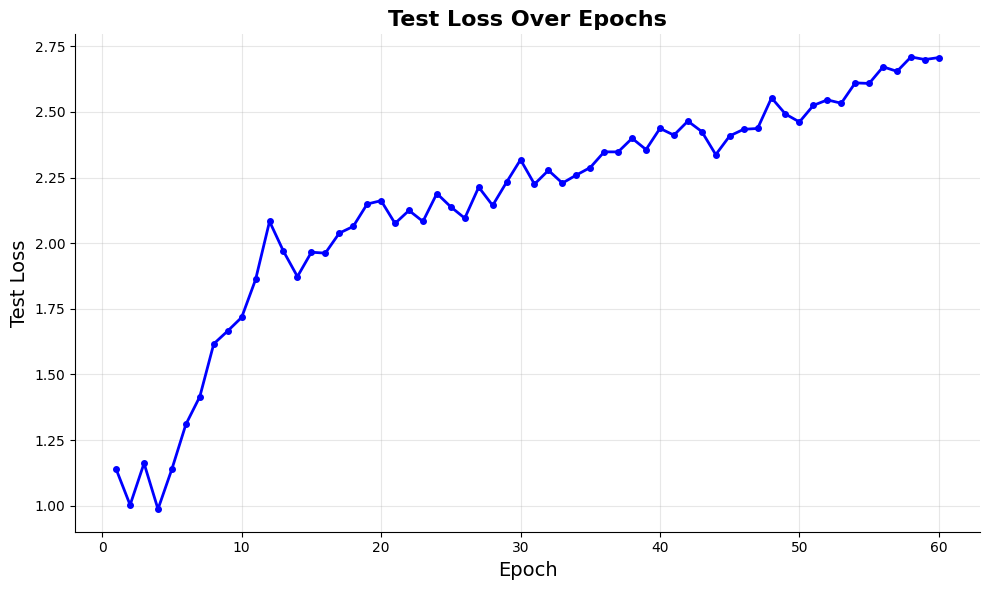

Plot saved as 'test_loss_plot.png'


<Figure size 640x480 with 0 Axes>

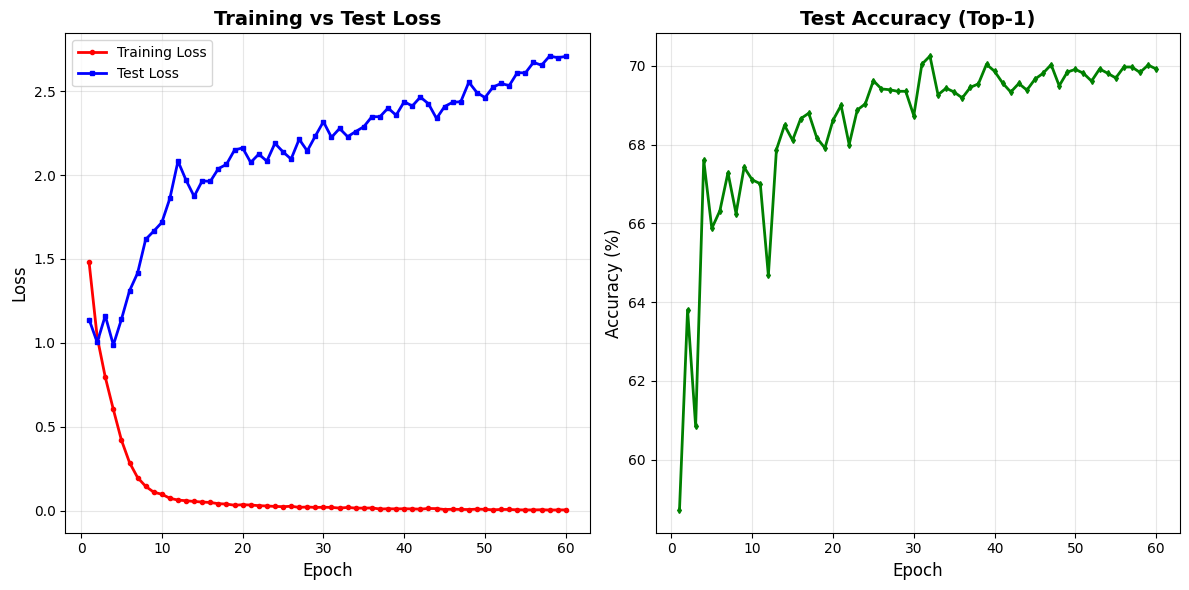

Comparison plot saved as 'training_comparison_plot.png'
Test Loss Analysis:
Initial test loss (Epoch 1): 1.138949
Final test loss (Epoch 60): 2.707017
Minimum test loss: 0.986982 at epoch 4
Maximum test loss: 2.709405 at epoch 58

Last 10 epochs trend:
Test loss change: +0.182168
Train loss change: -0.000318
⚠️  Potential overfitting detected: test loss increasing while training loss decreasing


<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

# Create a plot for test losses
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['test_loss'], 'b-', linewidth=2, marker='o', markersize=4)
plt.title('Test Loss Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Test Loss', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add some styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

# Optional: Save the plot
plt.savefig('test_loss_plot.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'test_loss_plot.png'")

# Create a comparison plot of training vs test losses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train_loss'], 'r-', linewidth=2, label='Training Loss', marker='o', markersize=3)
plt.plot(df['epoch'], df['test_loss'], 'b-', linewidth=2, label='Test Loss', marker='s', markersize=3)
plt.title('Training vs Test Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['test_accuracy_top1'], 'g-', linewidth=2, marker='d', markersize=3)
plt.title('Test Accuracy (Top-1)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Optional: Save the comparison plot
plt.savefig('training_comparison_plot.png', dpi=300, bbox_inches='tight')
print("Comparison plot saved as 'training_comparison_plot.png'")

# Analyze test loss trends
print("Test Loss Analysis:")
print(f"Initial test loss (Epoch 1): {df['test_loss'].iloc[0]:.6f}")
print(f"Final test loss (Epoch {df['epoch'].iloc[-1]}): {df['test_loss'].iloc[-1]:.6f}")
print(f"Minimum test loss: {df['test_loss'].min():.6f} at epoch {df.loc[df['test_loss'].idxmin(), 'epoch']}")
print(f"Maximum test loss: {df['test_loss'].max():.6f} at epoch {df.loc[df['test_loss'].idxmax(), 'epoch']}")

# Check if the model is overfitting (test loss increasing while train loss decreasing)
final_10_epochs = df.tail(10)
test_loss_trend = final_10_epochs['test_loss'].iloc[-1] - final_10_epochs['test_loss'].iloc[0]
train_loss_trend = final_10_epochs['train_loss'].iloc[-1] - final_10_epochs['train_loss'].iloc[0]

print(f"\nLast 10 epochs trend:")
print(f"Test loss change: {test_loss_trend:+.6f}")
print(f"Train loss change: {train_loss_trend:+.6f}")

if test_loss_trend > 0 and train_loss_trend < 0:
    print("⚠️  Potential overfitting detected: test loss increasing while training loss decreasing")
else:
    print("✅ No clear overfitting pattern in the last 10 epochs")

Plot saved as 'losses_comparison.png'


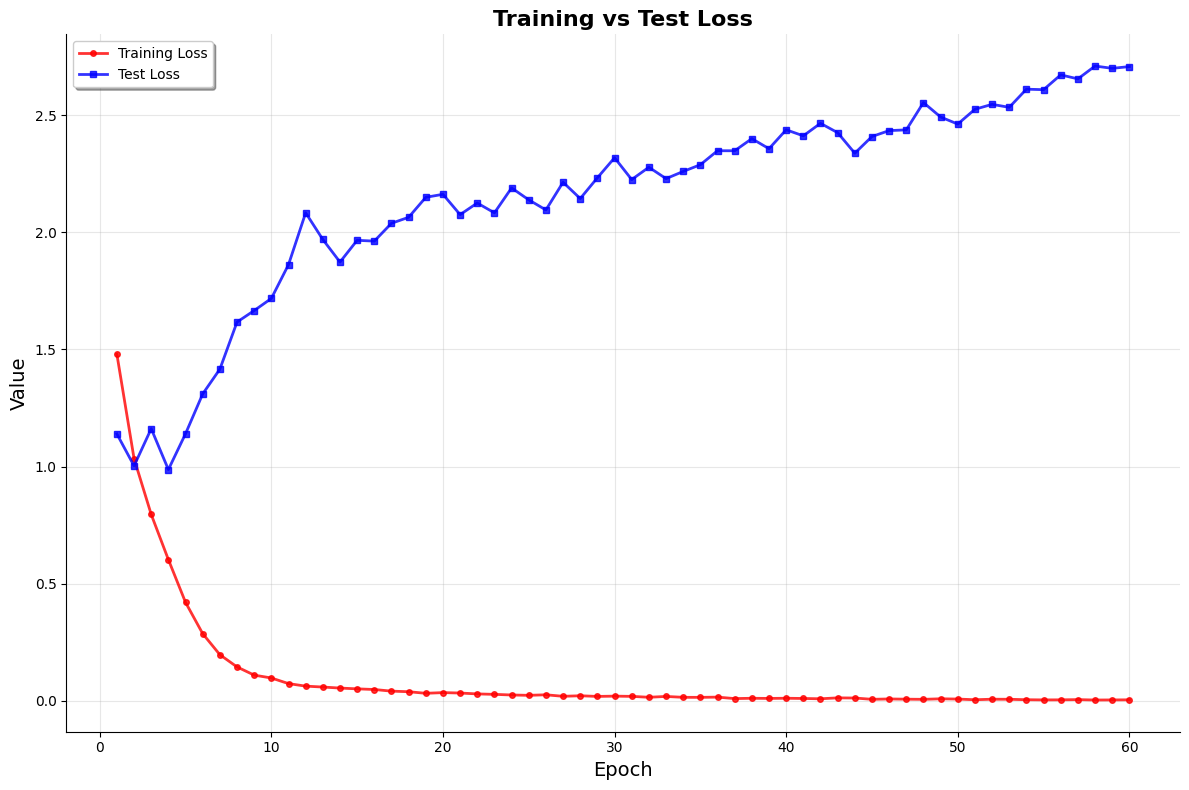

In [8]:
def plot_multiple_metrics(df, metrics_config, title="Multiple Metrics Over Epochs", 
                         figsize=(12, 8), save_path=None, x_column='epoch'):
    """
    Plot multiple metrics on the same graph with legend
    
    Parameters:
    - df: pandas DataFrame containing the data
    - metrics_config: list of dictionaries, each containing:
        - 'column': column name in DataFrame
        - 'label': label for legend
        - 'color': color for the line (optional)
        - 'linestyle': line style (optional, default '-')
        - 'marker': marker style (optional, default 'o')
    - title: plot title
    - figsize: figure size tuple
    - save_path: path to save the plot (optional)
    - x_column: column to use for x-axis (default 'epoch')
    
    Example usage:
    metrics = [
        {'column': 'train_loss', 'label': 'Training Loss', 'color': 'red'},
        {'column': 'test_loss', 'label': 'Test Loss', 'color': 'blue'},
        {'column': 'train_accuracy_top1', 'label': 'Train Acc', 'color': 'green'}
    ]
    plot_multiple_metrics(df, metrics, "Training Progress")
    """
    
    plt.figure(figsize=figsize)
    
    # Default colors and styles cycle
    default_colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    default_markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    for i, metric in enumerate(metrics_config):
        column = metric['column']
        label = metric['label']
        color = metric.get('color', default_colors[i % len(default_colors)])
        linestyle = metric.get('linestyle', '-')
        marker = metric.get('marker', default_markers[i % len(default_markers)])
        markersize = metric.get('markersize', 4)
        linewidth = metric.get('linewidth', 2)
        
        if column in df.columns:
            plt.plot(df[x_column], df[column], 
                    color=color, 
                    linestyle=linestyle, 
                    marker=marker,
                    markersize=markersize,
                    linewidth=linewidth,
                    label=label,
                    alpha=0.8)
        else:
            print(f"Warning: Column '{column}' not found in DataFrame")
    
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(x_column.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.legend(loc='best', frameon=True, fancybox=True, shadow=True)
    plt.grid(True, alpha=0.3)
    
    # Remove top and right spines for cleaner look
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved as '{save_path}'")
    
    plt.show()

# Example usage 1: Plot losses
loss_metrics = [
    {'column': 'train_loss', 'label': 'Training Loss', 'color': 'red', 'marker': 'o'},
    {'column': 'test_loss', 'label': 'Test Loss', 'color': 'blue', 'marker': 's'}
]

plot_multiple_metrics(df, loss_metrics, 
                     title="Training vs Test Loss", 
                     save_path="losses_comparison.png")

# # Example usage 2: Plot accuracies
# accuracy_metrics = [
#     {'column': 'train_accuracy_top1', 'label': 'Train Top-1 Acc', 'color': 'green', 'marker': '^'},
#     {'column': 'test_accuracy_top1', 'label': 'Test Top-1 Acc', 'color': 'orange', 'marker': 'D'},
#     {'column': 'train_accuracy_top5', 'label': 'Train Top-5 Acc', 'color': 'purple', 'marker': 'v'},
#     {'column': 'test_accuracy_top5', 'label': 'Test Top-5 Acc', 'color': 'brown', 'marker': '<'}
# ]

# plot_multiple_metrics(df, accuracy_metrics, 
#                      title="Training and Test Accuracies", 
#                      save_path="accuracies_comparison.png")

# # Example usage 3: Plot everything together (might be crowded)
# all_metrics = [
#     {'column': 'train_loss', 'label': 'Train Loss', 'color': 'red'},
#     {'column': 'test_loss', 'label': 'Test Loss', 'color': 'blue'},
#     {'column': 'train_accuracy_top1', 'label': 'Train Acc', 'color': 'green'},
#     {'column': 'test_accuracy_top1', 'label': 'Test Acc', 'color': 'orange'}
# ]

# plot_multiple_metrics(df, all_metrics, 
#                      title="All Training Metrics", 
#                      figsize=(14, 8))